# Kaggle Diamonds Competition 💎

## 1. Import libraries

In [1]:
import pandas as pd
import pandas as pd
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as py

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, SGDRegressor, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## 2. Import data

In [4]:
train = pd.read_csv("../data/train_clean.csv")

In [5]:
test = pd.read_csv("../data/test_clean.csv")

In [6]:
train.head()

,carat,cut,color,clarity,depth,table,price
0,1.14,2,4,3,61.0,56.0,9013
1,0.76,2,5,5,62.7,57.0,2692
2,0.84,2,4,4,61.4,56.0,4372
3,1.55,2,5,4,62.0,57.0,13665
4,0.30,2,4,7,61.9,57.0,422


In [7]:
train.head()

,carat,cut,color,clarity,depth,table,price
0,1.14,2,4,3,61.0,56.0,9013
1,0.76,2,5,5,62.7,57.0,2692
2,0.84,2,4,4,61.4,56.0,4372
3,1.55,2,5,4,62.0,57.0,13665
4,0.30,2,4,7,61.9,57.0,422


In [9]:
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

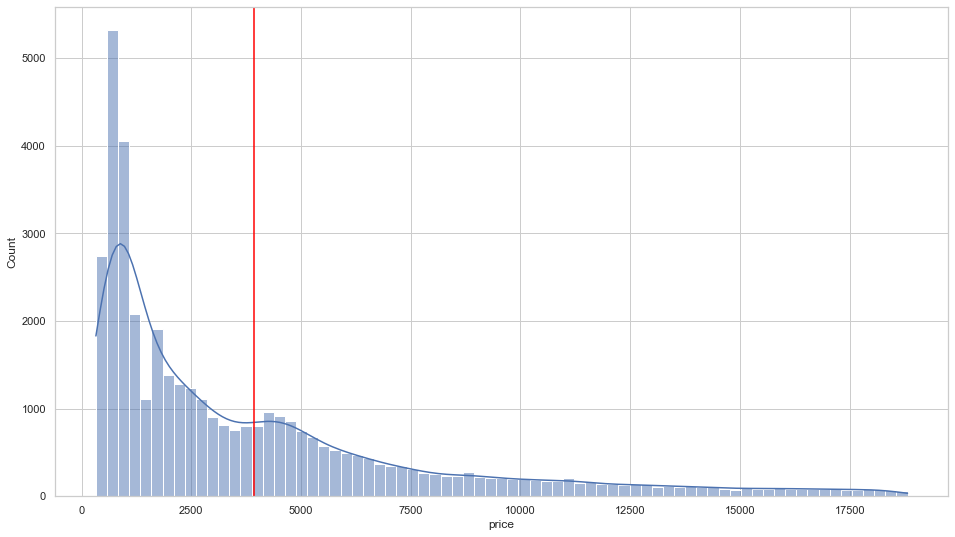

In [10]:
fig = sns.histplot(x = "price", data=train, kde=True)
fig.axvline(x=train.price.mean(), color="red", label="media")

## 2. Training different models

In [11]:
# Target variable. Only the column that I am going to predict.
y = train.price

In [12]:
# Drop the price column for the X.
X = train.drop(["price"],axis=1)

In [13]:
# Assign the variables train test split.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [14]:
# Store all the models to be trained in a dictionary.
models = {"lr": LinearRegression(),
          "ridge": Ridge(),
          "lasso": Lasso(),
          "sgd": SGDRegressor(),
          "knn": KNeighborsRegressor(),
          'rfc': RandomForestRegressor(),
          
          
}

In [15]:
# Iterate on the models to train them.
for name, model in models.items():
    print("entrenando ", name)
    model.fit(X_train,y_train)

entrenando  lr
entrenando  ridge
entrenando  lasso
entrenando  sgd
entrenando  knn
entrenando  rfc


In [16]:
# We use the same process to make predictions for each algorithm and extract metrics.
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"--------{name}--------")
    print('RMSE - Raiz Error Cuadratico Medio', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('R2 - Coeficiente de Determinacion', metrics.r2_score(y_test, y_pred)) 

--------lr--------
RMSE - Raiz Error Cuadratico Medio 1244.5544764599554
R2 - Coeficiente de Determinacion 0.9030240228365722
--------ridge--------
RMSE - Raiz Error Cuadratico Medio 1244.5311569176147
R2 - Coeficiente de Determinacion 0.9030276569309597
--------lasso--------
RMSE - Raiz Error Cuadratico Medio 1244.4829258572106
R2 - Coeficiente de Determinacion 0.903035172995594
--------sgd--------
RMSE - Raiz Error Cuadratico Medio 99594178.25383121
R2 - Coeficiente de Determinacion -621018083.2535919
--------knn--------
RMSE - Raiz Error Cuadratico Medio 1898.3472669977716
R2 - Coeficiente de Determinacion 0.7743747685863938
--------rfc--------
RMSE - Raiz Error Cuadratico Medio 557.0970228102153
R2 - Coeficiente de Determinacion 0.9805688718042599


### 2.1. Random Forest

We select the Random Forest model because it has de lowest RMSE.

In [17]:
forest = RandomForestRegressor()

In [18]:
# train model
forest.fit(X_train, y_train)

RandomForestRegressor()

In [19]:
y_pred = forest.predict(X_test)

In [20]:
print('RMSE - Raiz Error Cuadratico Medio', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE - Raiz Error Cuadratico Medio 554.3072012945415


In [21]:
model_1 = forest.fit(X,y)

In [22]:
#predict price on test
price = model_1.predict(test)

In [23]:
#include column price
test["price"] = price

In [24]:
test_1 = test.drop(["carat","cut","clarity","depth","table","color"],axis=1)

In [25]:
#rename index to id
test_1.index.rename("id", inplace=True)

In [26]:
test_1.head()

,price
id,
0,3307.950000
1,3256.660000
2,3323.146667
3,3244.410000
4,5354.056667


In [28]:
#test_1.to_csv("../predictions/prediction_3.csv")

In [27]:
test = test.drop(["price"],axis=1)

In [28]:
# RandomForest tunable hyperparameters
params = {'n_estimators': [200, 250, 300],
                   'max_features': ['auto', 'sqrt'],
                   'max_depth': [10, 200],
                   'min_samples_leaf': [1, 2, 7]}

In [29]:
# save the grid search with the algorithm, parameters and verbose to show process info.
grid = GridSearchCV(forest, params, verbose=1)

In [24]:
# train the grid with the train data
grid.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 200],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 7],
                         'n_estimators': [200, 250, 300]},
             verbose=1)

In [25]:
# best parameters given by the model.
print(grid.best_params_)

{'max_depth': 200, 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 300}


In [30]:
# train the model with the best parameters
forest = RandomForestRegressor(bootstrap = True, max_depth =  200, 
                               max_features =  'auto', min_samples_leaf =  7, n_estimators = 300)

In [31]:
# train model and obtain new prediction.
forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=200, min_samples_leaf=7, n_estimators=300)

In [32]:
y_pred = forest.predict(X_test)

In [33]:
# RMSE metric for new prediction.
print('RMSE - Raiz Error Cuadratico Medio', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE - Raiz Error Cuadratico Medio 555.341193018272


In [34]:
test.head()

,carat,cut,color,clarity,depth,table
id,,,,,,
0,1.00,5,7,7,56.3,64.0
1,0.83,1,4,6,62.3,58.0
2,1.00,5,2,7,67.0,53.0
3,1.00,5,5,7,66.5,62.0
4,1.20,3,6,6,62.6,57.0


In [35]:
model_2 = forest.fit(X,y)

In [36]:
#predict price on test
price = model_2.predict(test)

In [37]:
#include column price
test["price"] = price

In [38]:
test_2 = test.drop(["carat","cut","clarity","depth","table","color"],axis=1)

In [39]:
#rename index to id
test_2.index.rename("id", inplace=True)

In [40]:
test_2.head()

,price
id,
0,3297.821046
1,2999.356409
2,3457.443203
3,3127.053393
4,5335.527565


In [ ]:
#test_2.to_csv("../predictions/prediction_1.csv")

In [41]:
test = test.drop(["price"],axis=1)

In [42]:
test.head()

,carat,cut,color,clarity,depth,table
id,,,,,,
0,1.00,5,7,7,56.3,64.0
1,0.83,1,4,6,62.3,58.0
2,1.00,5,2,7,67.0,53.0
3,1.00,5,5,7,66.5,62.0
4,1.20,3,6,6,62.6,57.0


## Gradient

In [43]:
grad = GradientBoostingRegressor()

In [44]:
grad.fit(X_train,y_train)

GradientBoostingRegressor()

In [45]:
y_pred = grad.predict(X_test)

In [46]:
print('RMSE - Raiz Error Cuadratico Medio', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE - Raiz Error Cuadratico Medio 621.5821667838318


In [47]:
params={'n_estimators':[100,500], 
            'learning_rate': [0.1,0.05,0.02],
            'max_depth':[4], 
            'min_samples_leaf':[3], 
            'max_features':[1.0] } 

In [50]:
grid = GridSearchCV(grad, params, verbose=1)

In [52]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.05, 0.02], 'max_depth': [4],
                         'max_features': [1.0], 'min_samples_leaf': [3],
                         'n_estimators': [100, 500]},
             verbose=1)

In [53]:
print(grid.best_params_)

{'learning_rate': 0.1, 'max_depth': 4, 'max_features': 1.0, 'min_samples_leaf': 3, 'n_estimators': 500}


In [54]:
grad_best = GradientBoostingRegressor(max_depth =  4, max_features =  1 , min_samples_leaf =  3, n_estimators = 500)

In [55]:
grad_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, max_features=1, min_samples_leaf=3,
                          n_estimators=500)

In [56]:
y_pred = grad_best.predict(X_test)

In [57]:
print('RMSE - Raiz Error Cuadratico Medio', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE - Raiz Error Cuadratico Medio 596.0516542468627


In [58]:
model_5 = grad_best.fit(X,y)

In [117]:
price = model_5.predict(test)

In [61]:
test["price"] = price

In [63]:
test_3 = test.drop(["carat","cut","clarity","depth","table","color"],axis=1)

In [64]:
test_3.index.rename("id", inplace=True)

In [66]:
test_3.head()

,price
id,
0,3297.821046
1,2999.356409
2,3457.443203
3,3127.053393
4,5335.527565


In [67]:
#test_3.to_csv("../predictions/prediction_2.csv")